# Results Explorer for lorenz models

includes plotting the sindy coefficients $\Xi$, loss metrics and trajectories for different initial conditions 

### Choose Model

In [1]:
#CHOOSE MODEL
model_path = "checkpoints/kathleenReplica_1"
#CHOOSE MODEL

In [19]:
import sys
sys.path.append('../')
from trainer import SINDy_trainer
import jax.numpy as jnp
import numpy as np

#exmp input needs to have 128 as second dimension
exmp_input = jnp.ones((1, 128))
trainer = SINDy_trainer.load_from_checkpoint(model_path, exmp_input)

xi_raw = trainer.state.params['sindy_coefficients']
mask = trainer.state.mask

xi = xi_raw * mask
#making xi numpy array just to support assignment dont want to use .at[idx].set(val) method
xi = np.array(xi)


In [20]:
print(xi)

[[ 0.70404434 -8.563092   -1.6487381 ]
 [-7.8699336   6.49267    -9.165759  ]
 [-1.0547343  -3.0467486   2.6591117 ]
 [ 7.935249   -1.9712837   0.05427586]
 [ 0.04161778 -0.0294426  -0.00999417]
 [ 0.17735456 -0.02053266 -0.38544843]
 [-0.09519893 -0.30326226  0.62466294]
 [-0.04236656 -2.2591379  -2.9194818 ]
 [ 0.0755367   0.09080344 -0.17808074]
 [ 0.35987082 -0.01527066 -0.25580904]
 [ 1.7882768   1.0016466  -5.6210833 ]
 [-0.0958764   0.19965988 -0.4365813 ]
 [ 2.5465949   4.2569513  -1.7905976 ]
 [-0.06937664 -0.05283308  0.13042687]
 [-0.09555802  0.07805625 -0.08982925]
 [-0.9330374   0.09747645  3.205718  ]
 [-0.0960957   0.0936264   0.06744445]
 [-0.05583574 -2.1260757  -1.8950545 ]
 [ 0.05021516  0.09511793 -0.09673265]
 [ 0.65073967  2.1663067  -0.05866451]]


# plot $\Xi$

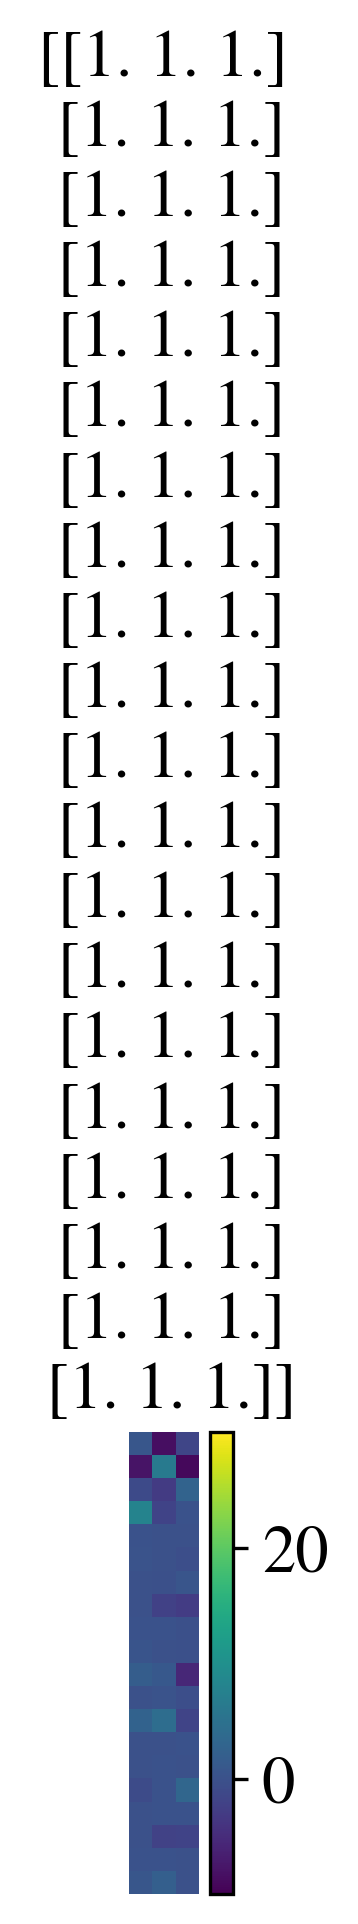

In [21]:
# sys.path.append('../plot_utils')
import matplotlib.pyplot as plt
from plot_utils.plot_xi import plot_sindy_coefficients
import plot_utils 

plt.style.use("../plot_utils/plot_settings.mplstyle")

plot_sindy_coefficients(xi, mask, save_path = "xi_plot.png")


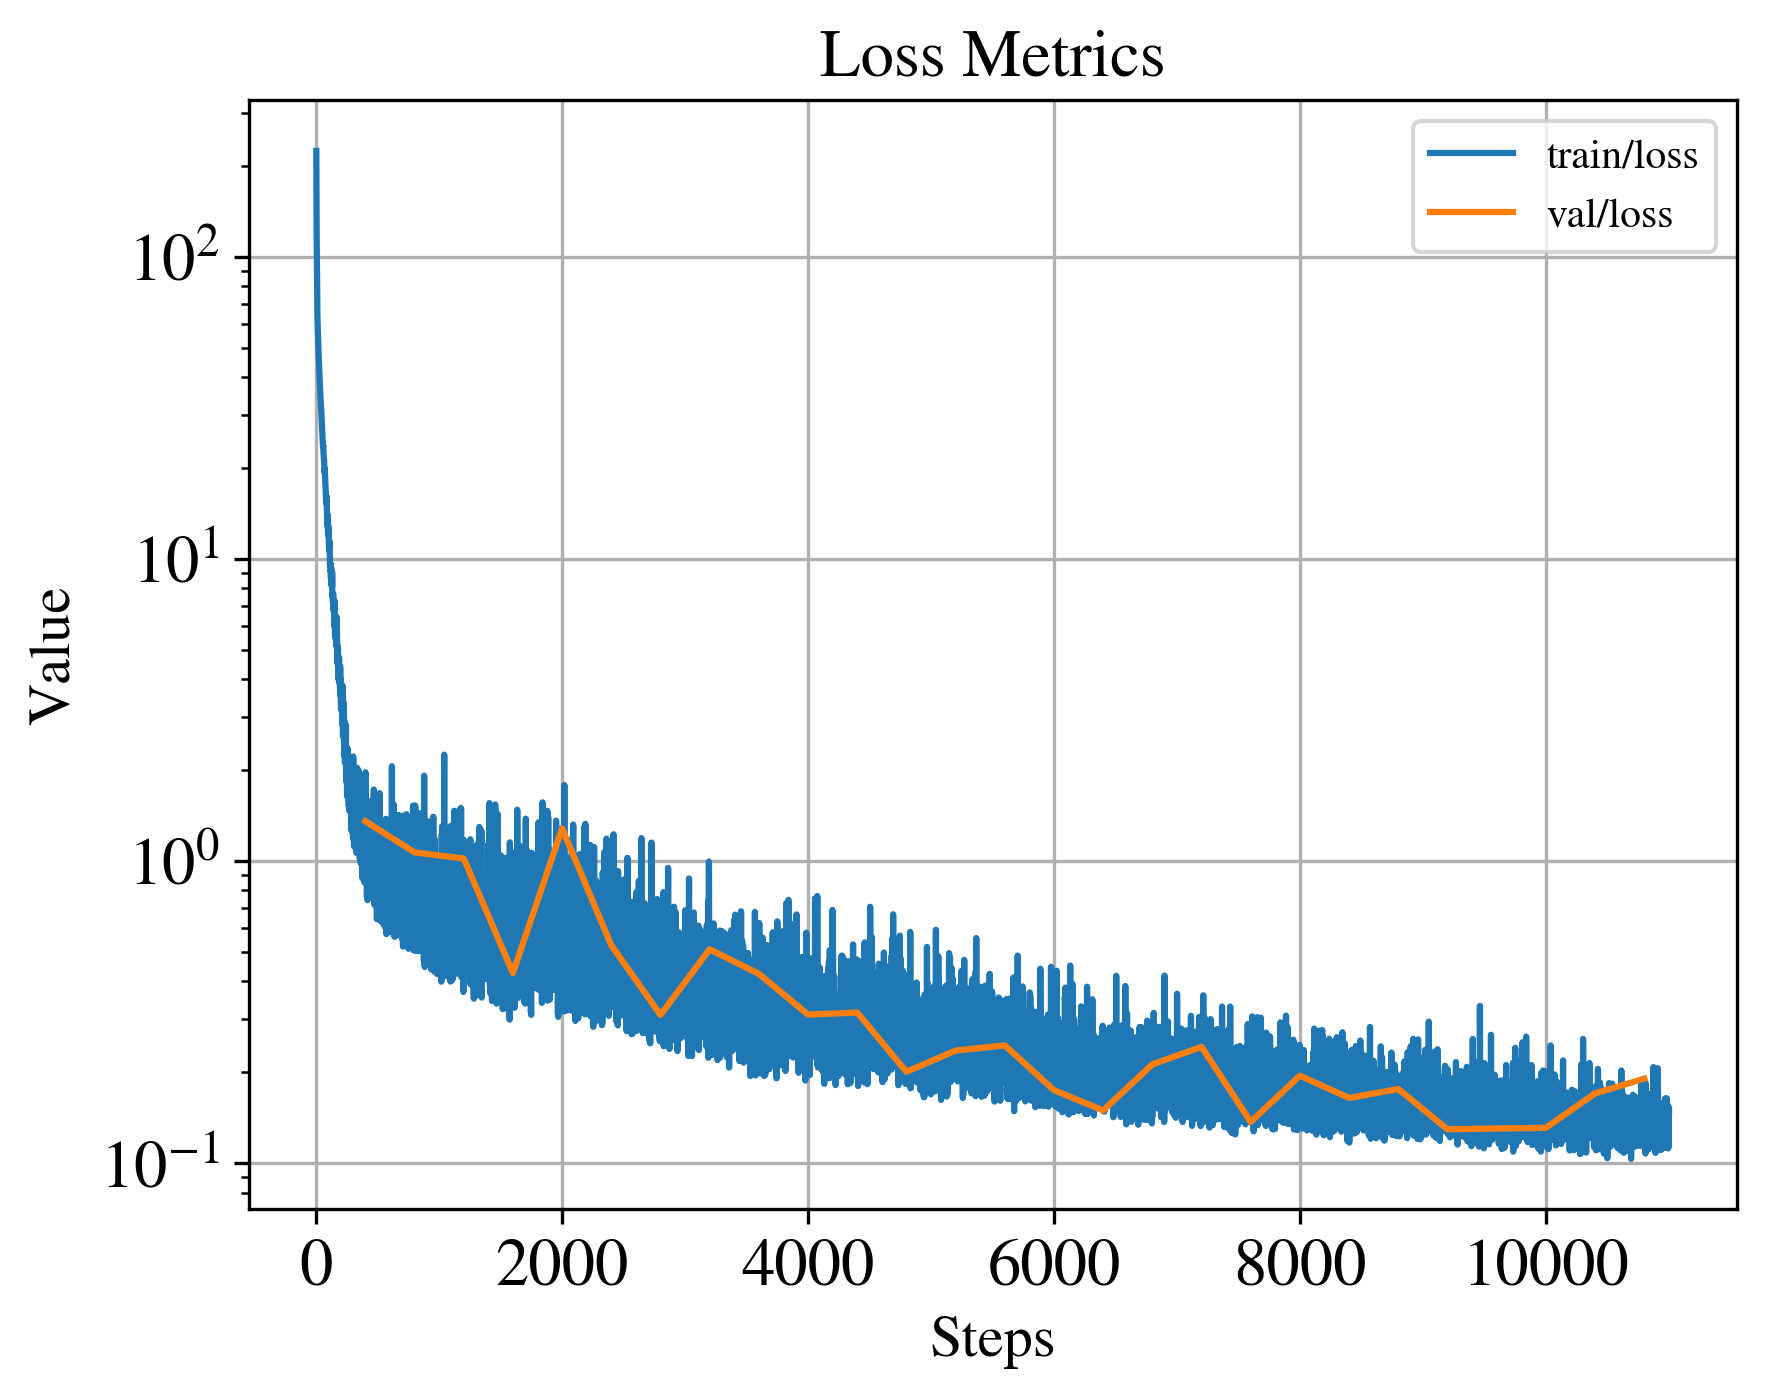

In [23]:
from metrics import RunMetrics # type: ignore -goofy linitng issue
from plot_metrics import plot_metrics # type: ignore -goofy linitng issue


metrics = RunMetrics(model_path)

# Plot a single run
plot_metrics(metrics, metric_names=["train/loss", "val/loss"], title="Loss Metrics")